# EDA analysis of Strebelle training image

### Importing libraries

In [1]:
import os
import cv2
import numpy

import matplotlib.pyplot as plt

In [2]:
# Move to previous folder
os.chdir("..")

In [3]:
STREBELLE_PATH: str = "data/TI/strebelle.png"
CONDITIONING_DATA: str = "data/conditioning_data/samples50"

/tmp/ipykernel_978/4218794098.py:18: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),


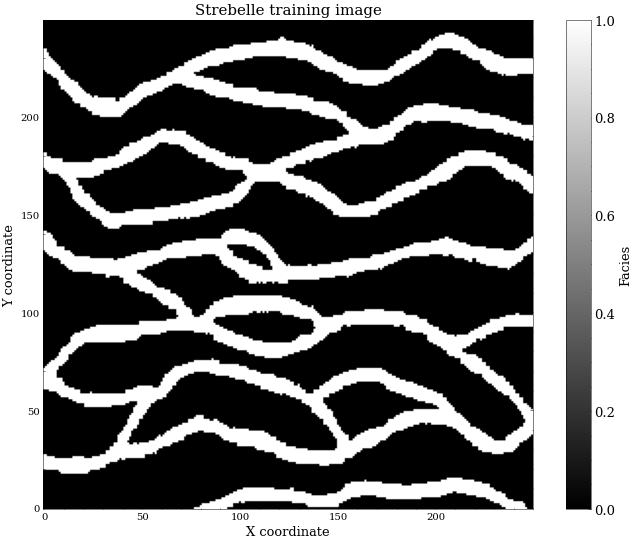

In [60]:
import matplotlib as mpl


ti = cv2.imread(STREBELLE_PATH)
ti = ti/255

# Plotting
plt.style.use(["science", "grid", "no-latex"])

fig = plt.figure(figsize=(12,9))
plt.imshow(ti, cmap="gray", origin="lower")
plt.title("Strebelle training image", size=15)
plt.xlabel("X coordinate", size=13)
plt.ylabel("Y coordinate", size=13)

cmap = mpl.cm.gray
norm = mpl.colors.Normalize(vmin=0, vmax=1)
cb = plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             orientation='vertical', label="Facies", spacing="proportional")
cb.ax.tick_params(labelsize=13)
cb.set_label("Facies", size=13)

# Saving images to .df format
plt.grid(False)
plt.savefig("training_image.pdf", dpi=500, format="pdf")
plt.show()

In [73]:
def generate_image_patches(img, num_rows, num_columns):
    """
    Generate image patches of approximately equal size from a source image.
    The patch size is based on the desired number of rows and columns.
    Patches are generated in row-major order.
    """

    width, height = img.shape[1], img.shape[0]
    w, h = width // num_columns, height // num_rows

    for y in range(0, height, h): 
        y_end = min(y + h, width)
        for x in range(0, width, w):
            x_end = min(x + w, height)
            yield img[y:y_end, x:x_end]
            
def create_image_patches(img, num_rows, num_columns):
    """
    Partition an image into multiple patches of approximately equal size.
    The patch size is based on the desired number of rows and columns.
    Returns a list of image patches, in row-major order.
    """

    return list(generate_image_patches(img, num_rows, num_columns))

ti_windows = create_image_patches(ti, 64, 64)

In [25]:
pixels = ti.shape[0] * ti.shape[1]

# Count white pixels
sought = [255, 255, 255]
white  = numpy.count_nonzero(numpy.all(ti==sought,axis=2))
print(f"Shale: {white/pixels * 100}%")

# Count black pixels
sought = [0,0,0]
black  = numpy.count_nonzero(numpy.all(ti==sought,axis=2))
print(f"Sandstone: {black/pixels * 100}%")

proportion_dict = {
    "Shale":white/pixels * 100,
    "Sandstone":black/pixels * 100
}

Shale: 26.7424%
Sandstone: 73.2576%


/tmp/ipykernel_978/3116375856.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["Shale", "Sandstone"], fontsize=13)


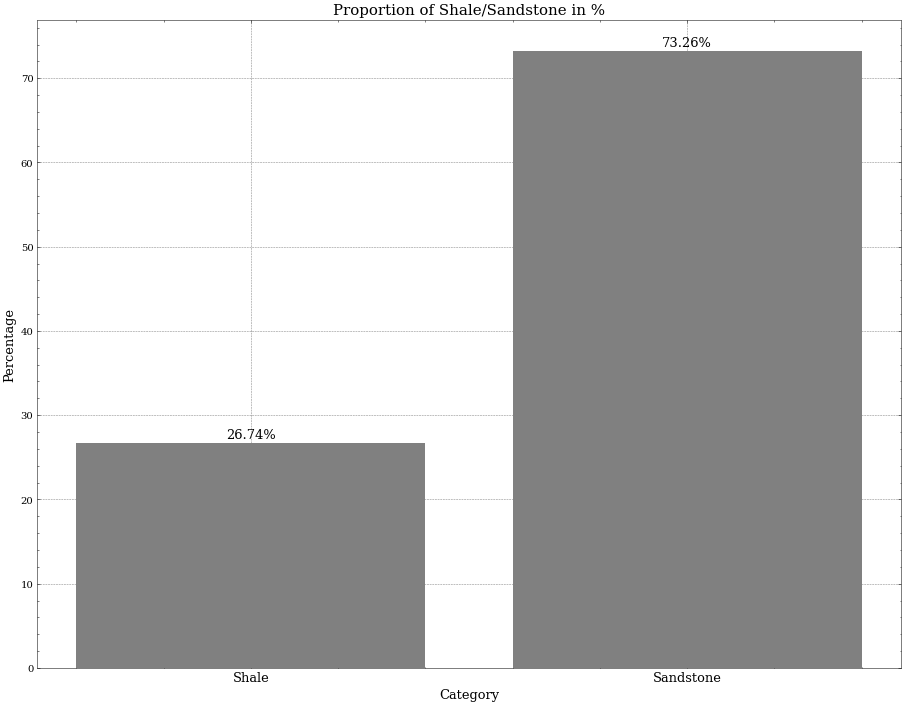

In [68]:
import matplotlib
plt.style.use(["science", "grid", "no-latex"])

fig = plt.figure(figsize=(12,9))
ax = fig.add_axes([0,0,1,1])
cat = ['Shale', 'Sandstone']
data = [proportion_dict["Shale"],
            proportion_dict["Sandstone"]]
ax.bar(cat, data, color="gray")

for bar in ax.patches:
    ax.annotate(f"{round(bar.get_height(), 2)}%",
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=13, xytext=(0, 8),
                   textcoords='offset points')

plt.title("Proportion of Shale/Sandstone in %", size=15)
ax.set_xticklabels(["Shale", "Sandstone"], fontsize=13) 
plt.xlabel("Category", size=13)
plt.ylabel("Percentage", size=13)
# Saving images to .pgf format
plt.savefig("proportion.pdf", dpi=500, format="pdf")
plt.show()